# Question 1
This exercise utilizes the data set *Salary.sav*, which can be downloaded from this site: http://edhd.bgsu.edu/amm/datasets.html

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
from scipy import stats
import seaborn as sb
import statsmodels.api as sm
import numbers
from sklearn.preprocessing import MinMaxScaler


In [355]:
# Read in the data
df = pd.read_excel('Salary_Problem_1.xlsx', header=0)

## 1. Examination of Data

### A. Sample the data
Take a sample of 350 observations

In [495]:
# Sample the data and set a random state to ensure repeatability
df = df.sample(n=350, random_state=123)

In [496]:
# Confirm that the sample is 350 observations
print(len(df))

350


In [497]:
# Take a look at the data
df.head()

,Index,beginning_salary,sex,job_seniority,age,current_salary,education_level,work_experience,employment_category,minority_classification,sex_race_classification
425,426,5700,0,98,33.67,11100,15,2.83,2,1,2
418,419,7200,0,72,39.83,14280,16,11.50,1,1,2
345,346,6000,1,90,44.50,13320,12,0.25,2,0,3
240,241,4500,1,69,23.75,8340,12,0.00,2,0,3
22,23,16992,0,85,43.25,27700,20,11.17,7,0,1


In [498]:
# Save sample as csv
#df.to_csv('q1_salary_sample.csv')

In [359]:
# Look at the data types
df.dtypes

Index                        int64
beginning_salary             int64
sex                          int64
job_seniority                int64
age                        float64
current_salary               int64
education_level              int64
work_experience            float64
employment_category          int64
minority_classification      int64
sex_race_classification      int64
dtype: object

## B. Testing Univariate Normality
Perform the univariate Normality test for all the metric variables

In [360]:
# Classify the data as metric and non-metric variables
metric_vars = ['beginning_salary', 'job_seniority', 'age', 'current_salary', 'work_experience']
categorical_vars = ['sex', 'education_level', 'employment_category', 'minority_classification', 
                    'sex_race_classification']

### Part 1 Understanding the Shape of the Distribution
Histogram, Box-Plot, and Normal Probability plot of metric variables



 Univariate Profiling: Examining the Shape of Distribution for beginning_salary


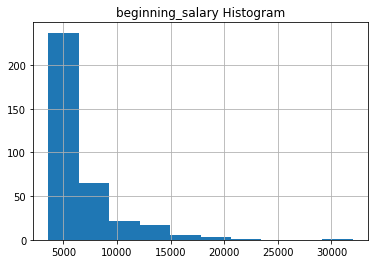

Mean (solid line): 6795.942857142857
Median(dotted line): 6000.0


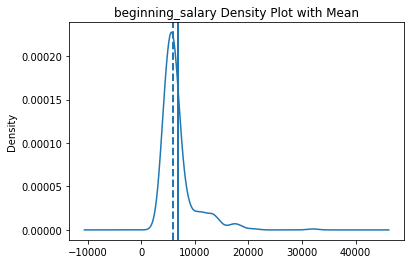

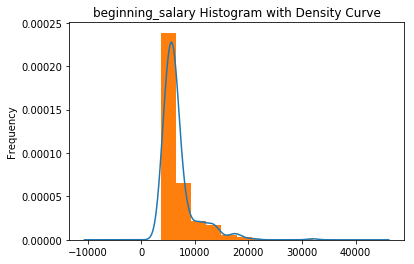

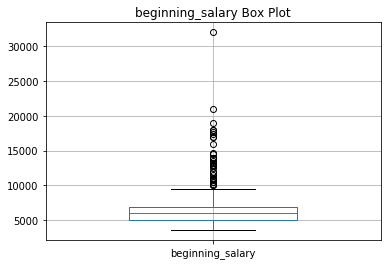

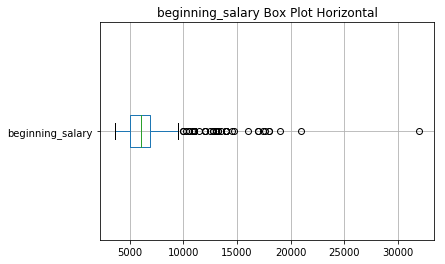

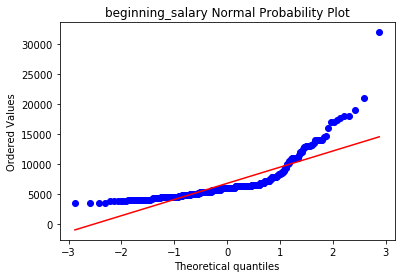



 Univariate Profiling: Examining the Shape of Distribution for job_seniority


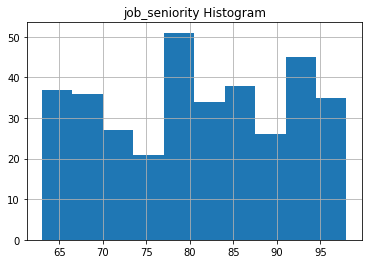

Mean (solid line): 80.78
Median(dotted line): 81.0


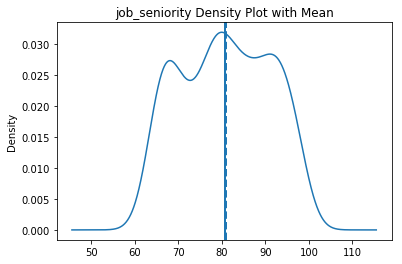

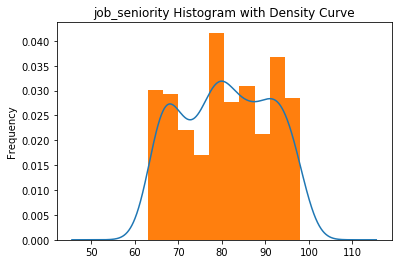

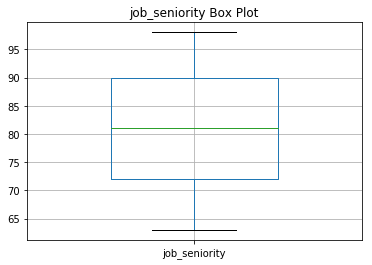

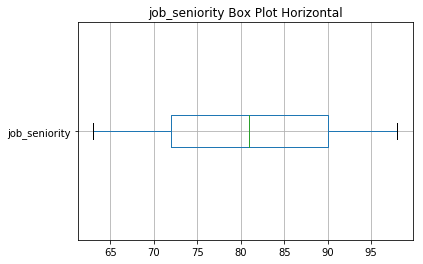

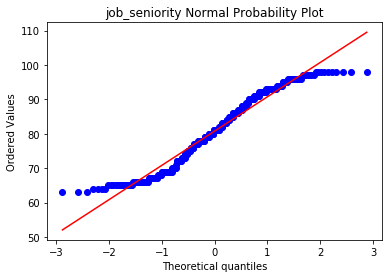



 Univariate Profiling: Examining the Shape of Distribution for age


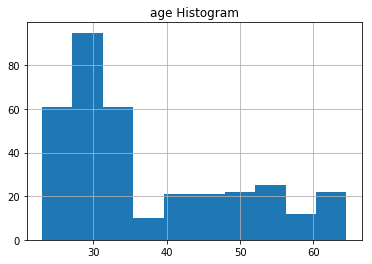

Mean (solid line): 37.37154285714286
Median(dotted line): 32.25


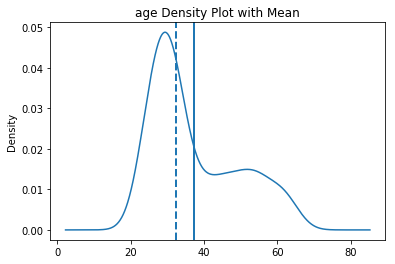

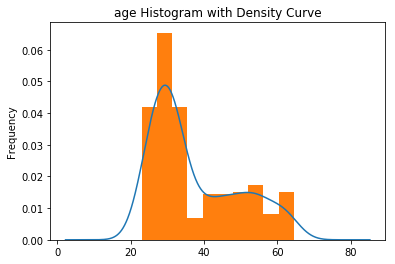

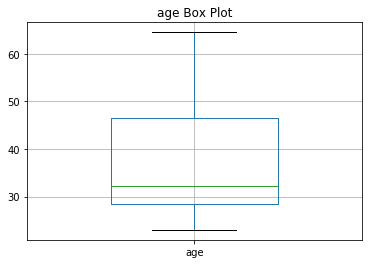

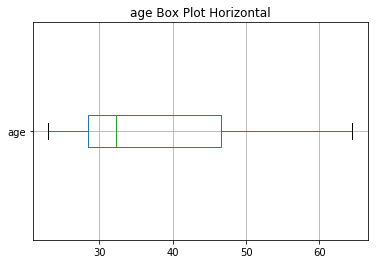

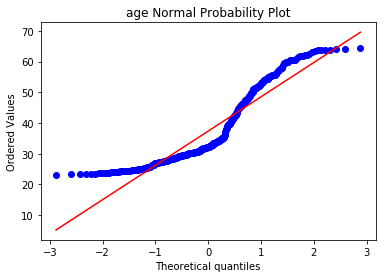



 Univariate Profiling: Examining the Shape of Distribution for current_salary


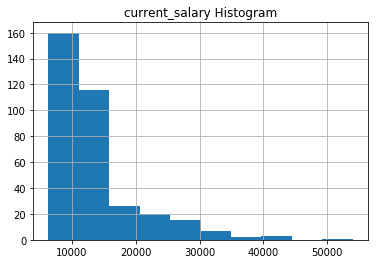

Mean (solid line): 13682.011428571428
Median(dotted line): 11430.0


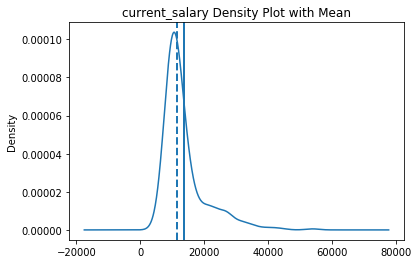

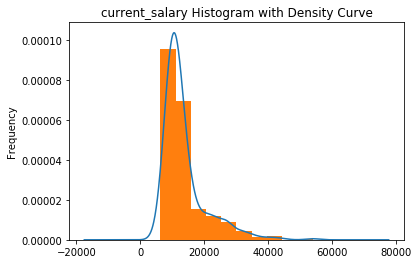

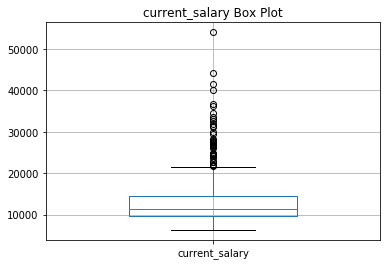

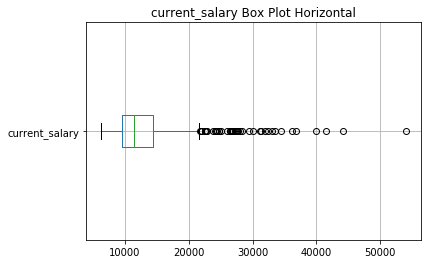

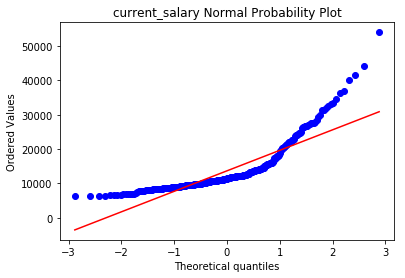



 Univariate Profiling: Examining the Shape of Distribution for work_experience


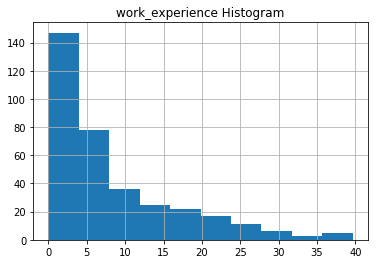

Mean (solid line): 8.15451428571429
Median(dotted line): 4.75


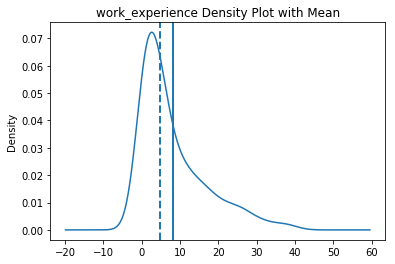

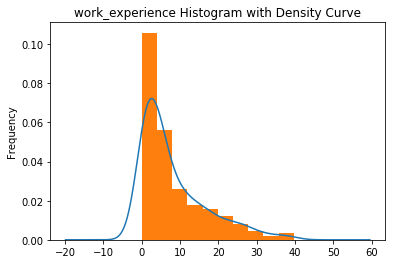

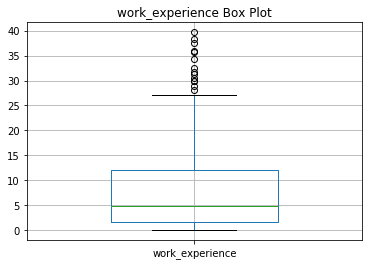

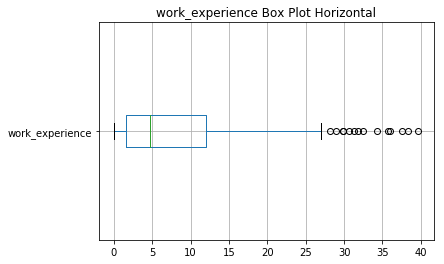

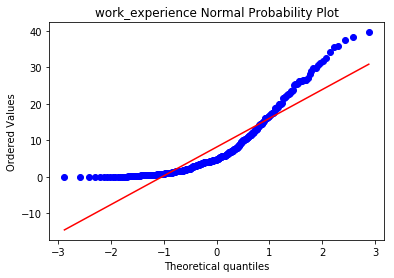

In [361]:
def display_distribution(i, df):
    print('\n\n Univariate Profiling: Examining the Shape of Distribution for {}'.format(i))
    # Histogram
    df.hist(column=i)
    plt.title("{} Histogram".format(i))
    plt.show()
    
    ax = df[i].plot(kind='density')
    mean_val = np.mean(df[i])
    median_val = np.median(df[i])
    print("Mean (solid line): {}\nMedian(dotted line): {}".format(mean_val, median_val))
    plt.axvline(mean_val, linestyle='solid', linewidth=2)
    plt.axvline(median_val, linestyle='dashed', linewidth=2)
    plt.title("{} Density Plot with Mean".format(i))
    plt.show()
    
    df[i].plot.kde()
    df[i].plot.hist(normed=True)
    plt.title("{} Histogram with Density Curve".format(i))
    plt.show()
    
    
    # Box Plot
    df.boxplot(column=i, widths=0.5)
    plt.title("{} Box Plot".format(i))
    plt.show()
    
    df.boxplot(column=i, vert=False) 
    plt.title("{} Box Plot Horizontal".format(i))
    plt.show()
    
    # Normal Probability Plot (QQ Plot)
    stats.probplot(df[i], dist="norm", plot=pylab)
    plt.title("{} Normal Probability Plot".format(i))
    plt.show()
    
    
for var in metric_vars:
    display_distribution(var, df)

### Part 2 Assessment of Normality
K-S Test and Shapiro Wick test of metric variables

The **Kolmogorov-Smirnov test** (K-S test) evaluateds the goodness of fit. This method performs a test of normal distribution against a given variable's distribution. Under the null hypothesis the two distributions are identical, G(x)=F(x). The KS test is only valid for continuous distributions.
* H0: The variable has normality
* Ha: The variable does not have normality

The **Shapiro-Wilk test** tests the null hypothesis that the data was drawn from a normal distribution.
* H0: The variable has normality
* Ha: The variable does not have normality

We fail to reject H0 if the p-value is greater than alpha (0.05), stating that the variable has normality.
We reject the H0 if the p-value is less than alpha (0.05), stating that the data does not have normality.


In [362]:
# For all of these tests, alpha will be 0.05
alpha = 0.05

In [363]:
def assess_normality(df, i, ks_test_results, sw_test_results):
    print('\nTest of Normality for {}'.format(i))
    # K-S Test for goodness of fit to the normal distribution
    ks_test_statistic, ks_p_val = stats.kstest(df[i], 'norm')
    print("K-S Test p-value = {}".format(ks_p_val))
    # Evaluate the test
    distribution, hypothesis, conclusion = evaluate_norm_hypothesis(ks_p_val, i)
    # Save the results
    print("{0}. {1}.".format(hypothesis, conclusion))
    ks_test_results = ks_test_results.append({'variable':i, 'p_value':ks_p_val, 'distribution':distribution, 
                                              'hypothesis':hypothesis, 'conclusion':conclusion}, ignore_index=True)
    
    
    # Shapiro-Wilk Test
    sw_test_statistic, sw_p_val = stats.shapiro(df[i])
    print("\nShapiro-Wilk Test p-value = {}".format(sw_p_val))
    # Evaluate the test
    distribution, hypothesis, conclusion = evaluate_norm_hypothesis(sw_p_val, i)
    # Save the results    
    print("{0}. {1}.".format(hypothesis, conclusion))
    sw_test_results = sw_test_results.append({'variable':i, 'p_value':sw_p_val, 'distribution':distribution, 
                                              'hypothesis':hypothesis, 'conclusion':conclusion}, ignore_index=True)
    return ks_test_results, sw_test_results

def evaluate_norm_hypothesis(p_val, i):
    if p_val > alpha:  
        distribution = "Normal"
        hypothesis = "We fail to reject the H0 that {} has normality".format(i)
        conclusion = "The distribution of {} is normal".format(i)
    else:
        distribution = "Not Normal"
        hypothesis = "We reject the H0 that {} has normality".format(i)
        conclusion = "The distribution of {} is not normal".format(i)
    return distribution, hypothesis, conclusion
    
ks_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
sw_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    ks_test_results, sw_test_results = assess_normality(df, var, ks_test_results, sw_test_results)
    


Test of Normality for beginning_salary
K-S Test p-value = 0.0
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Shapiro-Wilk Test p-value = 1.79648575844952e-24
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test of Normality for job_seniority
K-S Test p-value = 0.0
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Shapiro-Wilk Test p-value = 3.0069120526832194e-09
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test of Normality for age
K-S Test p-value = 0.0
We reject the H0 that age has normality. The distribution of age is not normal.

Shapiro-Wilk Test p-value = 3.156118347456816e-16
We reject the H0 that age has normality. The distribution of age is not normal.

Test of Normality for current_salary
K-S Test p-value = 0.0
We reject the H0 that current_salary has 

In [364]:
print("K-S Test Results:")
ks_test_results

K-S Test Results:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,0.000000e+00,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,0.000000e+00,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,0.000000e+00,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,0.000000e+00,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,4.342012e-182,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [365]:
print("Shapiro Wick Test Results:")
sw_test_results  

Shapiro Wick Test Results:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,1.796486e-24,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,3.006912e-09,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,3.156118e-16,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,2.714378e-22,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,6.667949e-19,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


### Part 3 Test the Skewness of Distribution
Skewness Z-test and Kurtoses Z-test on metric variables

The **Normal test** Test whether a sample differs from a normal distribution.
* H0: The population from which the sample is drawn has normal distribution
* Ha: The population from which the sample is drawn does not have a normal distribution

The **Kurtoses test** Test whether a dataset has normal kurtosis. The null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.
* H0: The population from which the sample is drawn has normal distribution
* Ha: The population from which the sample is drawn does not have a normal distribution

We fail to reject H0 if the Z-Statistic is less than 1.96, stating that the variable has normality.
We reject the H0 if the Z-Statistic is greater than 1.96, stating that the data does not have normality.

In [366]:
z_alpha = 1.96

In [367]:
def assess_skewness(df, i, norm_test_results, kurt_test_results):
    print('\nTest the Skewness of Distribution for {}'.format(i))
    # Normal Test
    norm_test_statistic, norm_p_val = stats.normaltest(df[i])
    norm_z_score = stats.norm.ppf(norm_p_val)
    print("Skewness Test Z-Score = {}".format(norm_z_score))
    # Evaluate the test
    distribution, hypothesis, conclusion = evaluate_skew_hypothesis(norm_z_score, i)
    # Save the results    
    print("{0}. {1}.".format(hypothesis, conclusion))
    norm_test_results = norm_test_results.append({'variable':i, 'test_statistic':norm_test_statistic, 
                                                  'z_score':norm_z_score, 'p_val':norm_p_val,
                                                  'distribution':distribution, 'hypothesis':hypothesis, 
                                                  'conclusion':conclusion}, ignore_index=True)
    
    # Kurtosis Test
    kurt_test_statistic, kurt_p_val = stats.kurtosistest(df[i])
    kurt_z_score = stats.norm.ppf(kurt_p_val)
    print("Kurtosis Test Z-Score = {}".format(kurt_z_score))
    # Evaluate the test
    distribution, hypothesis, conclusion = evaluate_skew_hypothesis(kurt_z_score, i)
    # Save the results    
    print("{0}. {1}.".format(hypothesis, conclusion))
    kurt_test_results = kurt_test_results.append({'variable':i, 'test_statistic':kurt_test_statistic,
                                                  'z_score':kurt_z_score, 'p_val':norm_p_val,
                                                  'distribution':distribution, 'hypothesis':hypothesis, 
                                                  'conclusion':conclusion}, ignore_index=True)
    return norm_test_results, kurt_test_results
        
def evaluate_skew_hypothesis(z_score, i):
    if z_score > z_alpha:  
        distribution = "Normal"
        hypothesis = "We fail to reject the H0 that {} has normality".format(i)
        conclusion = "The distribution of {} is normal".format(i)
    else:
        distribution = "Not Normal"
        hypothesis = "We reject the H0 that {} has normality".format(i)
        conclusion = "The distribution of {} is not normal".format(i)
    return distribution, hypothesis, conclusion

norm_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
kurt_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    norm_test_results, kurt_test_results = assess_skewness(df, var, norm_test_results, kurt_test_results)
   


Test the Skewness of Distribution for beginning_salary
Skewness Test Z-Score = -15.65140435677476
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.
Kurtosis Test Z-Score = -9.157562871985887
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test the Skewness of Distribution for job_seniority
Skewness Test Z-Score = -12.918907398359275
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.
Kurtosis Test Z-Score = -13.132045397511298
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test the Skewness of Distribution for age
Skewness Test Z-Score = -6.266731345330689
We reject the H0 that age has normality. The distribution of age is not normal.
Kurtosis Test Z-Score = -3.481357997102498
We reject the H0 that age has normality. The distribution of age is not normal.

Test the Skewne

In [368]:
print("Skewness Test Results:")
norm_test_results

Skewness Test Results:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,252.313539,-15.651404,1.624842e-55,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,173.865238,-12.918907,1.760529e-38,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,44.828340,-6.266731,1.843527e-10,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,178.618456,-13.100526,1.634915e-39,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,86.227046,-8.943326,1.888143e-19,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [369]:
print("Kurtosis Test Results:")
kurt_test_results

Kurtosis Test Results:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,9.232086,-9.157563,1.624842e-55,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,-13.184424,-13.132045,1.760529e-38,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,-3.662835,-3.481358,1.843527e-10,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,7.329121,-7.235642,1.634915e-39,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,3.723901,-3.545187,1.888143e-19,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


## C. Testing Normality of Non-metric Variables
Perform the univariate Normality test for all the metric variables vs. gender variable

In [370]:
# Split the data by male and female
df0 = df[df['sex']==0]
df1 = df[df['sex']==1]

In [371]:
df0.head()

,Index,beginning_salary,sex,job_seniority,age,current_salary,education_level,work_experience,employment_category,minority_classification,sex_race_classification
11,12,6000,0,88,54.33,8880,12,27.00,1,0,1
417,418,8220,0,66,32.08,19600,15,7.17,1,1,2
397,398,6000,0,87,30.33,10680,15,4.67,1,1,2
431,432,13992,0,67,38.00,26500,19,8.25,6,1,2
34,35,13200,0,78,32.92,29400,19,3.75,4,0,1


In [372]:
df1.head()

,Index,beginning_salary,sex,job_seniority,age,current_salary,education_level,work_experience,employment_category,minority_classification,sex_race_classification
472,473,4080,1,85,51.00,7380,12,19.00,1,1,4
453,454,3600,1,97,60.67,6780,12,10.33,1,1,4
452,453,5700,1,74,45.17,9780,12,9.75,1,1,4
293,294,5400,1,77,27.08,11940,12,3.17,1,0,3
362,363,4500,1,69,23.67,9120,12,0.00,2,0,3


In [373]:
len(df0)

190

In [374]:
len(df1)

160

### Part 1 Understanding the Shape of the Distribution
Histogram, Box-Plot, and Normal Probability plot of metric variables



 Univariate Profiling: Examining the Shape of Distribution for beginning_salary


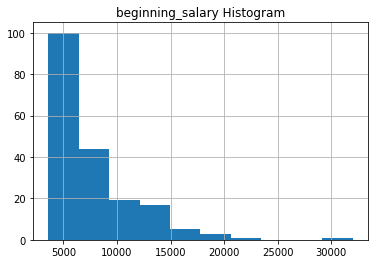

Mean (solid line): 8114.273684210526
Median(dotted line): 6300.0


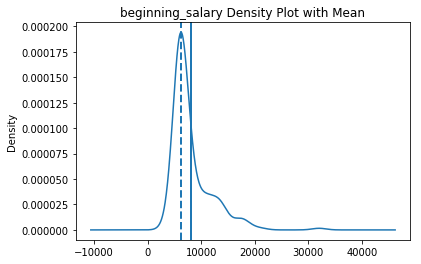

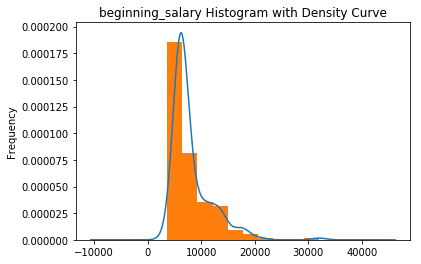

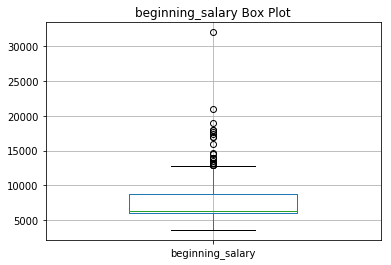

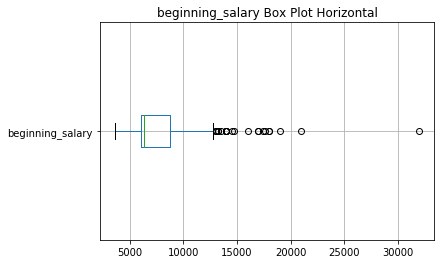

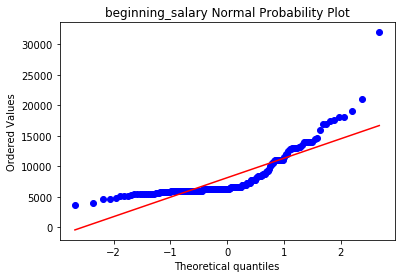



 Univariate Profiling: Examining the Shape of Distribution for job_seniority


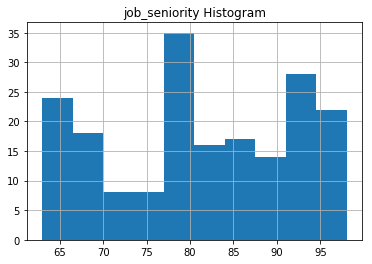

Mean (solid line): 81.22631578947369
Median(dotted line): 81.0


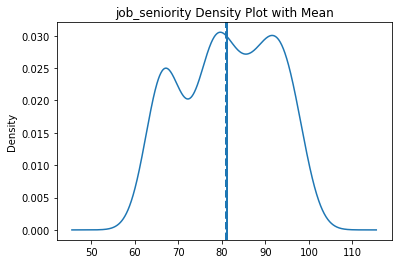

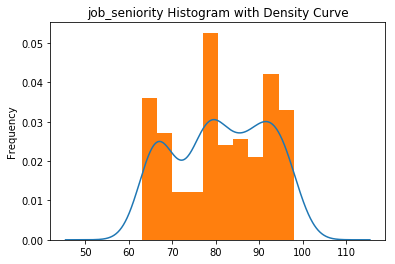

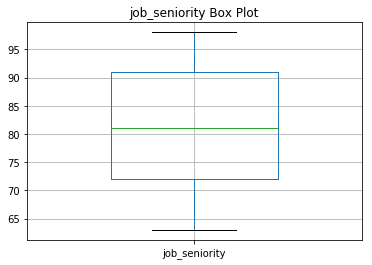

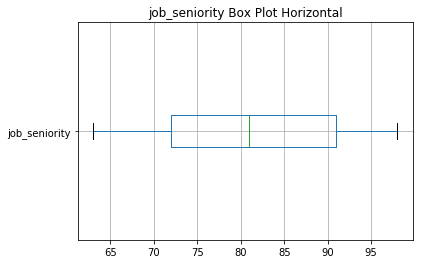

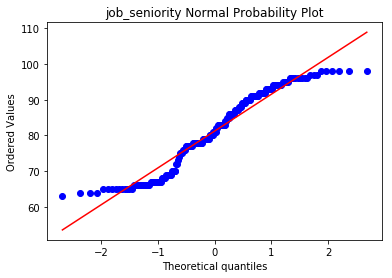



 Univariate Profiling: Examining the Shape of Distribution for age


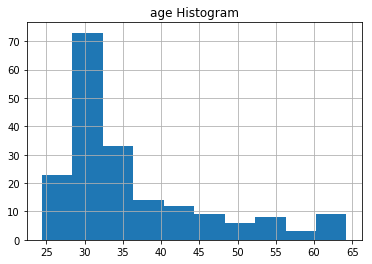

Mean (solid line): 36.28105263157895
Median(dotted line): 32.29


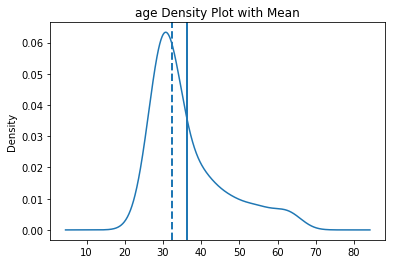

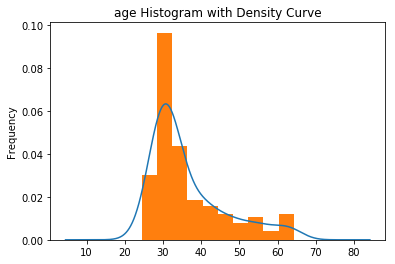

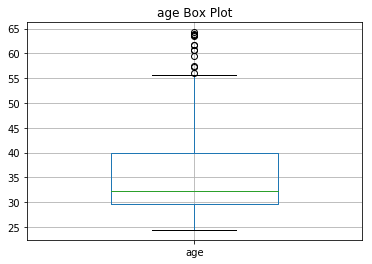

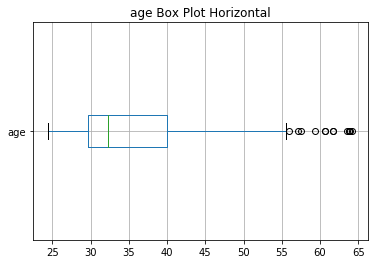

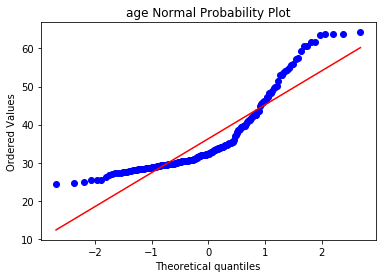



 Univariate Profiling: Examining the Shape of Distribution for current_salary


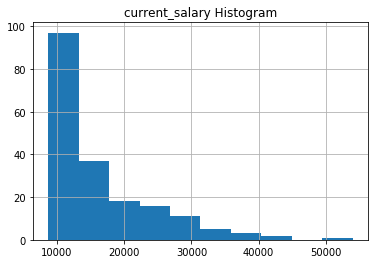

Mean (solid line): 16509.78947368421
Median(dotted line): 12900.0


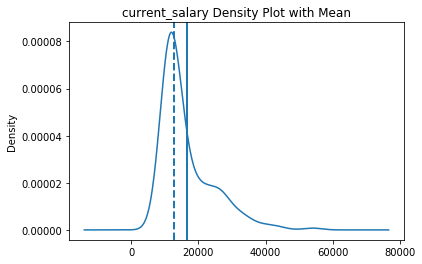

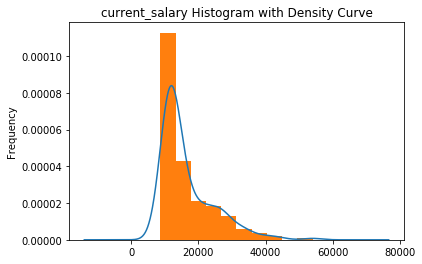

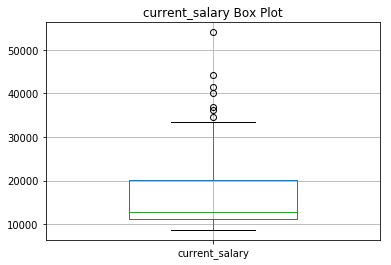

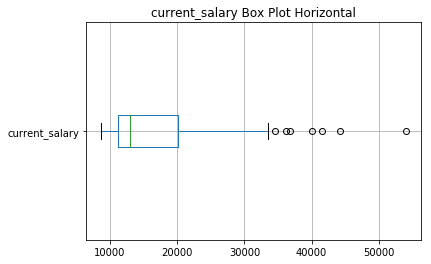

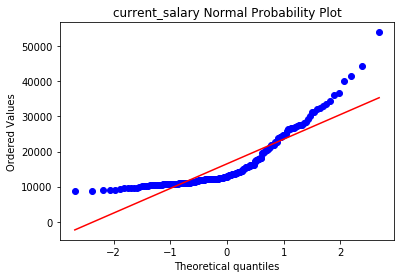



 Univariate Profiling: Examining the Shape of Distribution for work_experience


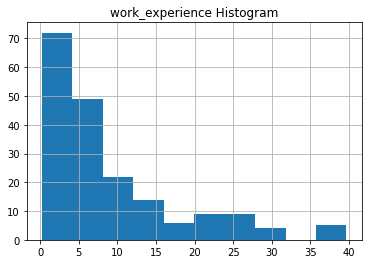

Mean (solid line): 9.103789473684216
Median(dotted line): 5.625


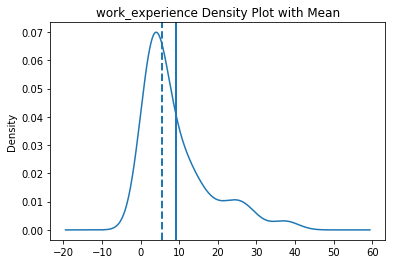

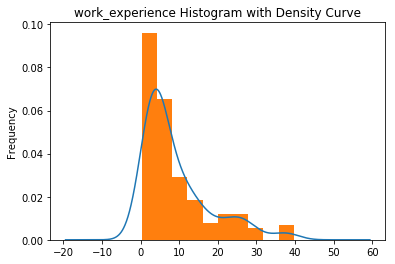

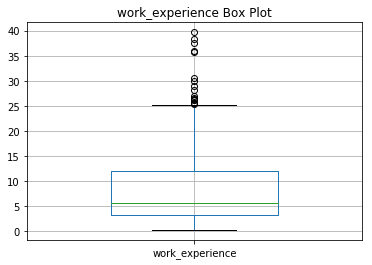

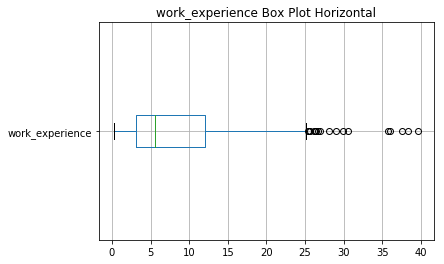

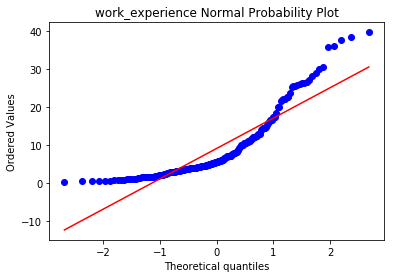

In [375]:
for var in metric_vars:
    display_distribution(var, df0)



 Univariate Profiling: Examining the Shape of Distribution for beginning_salary


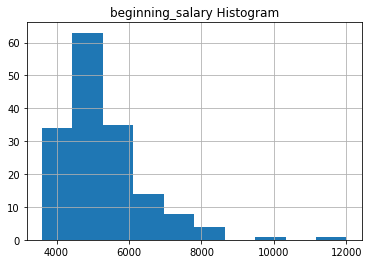

Mean (solid line): 5230.425
Median(dotted line): 4980.0


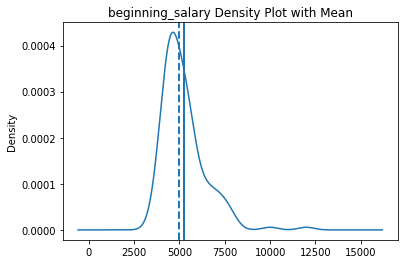

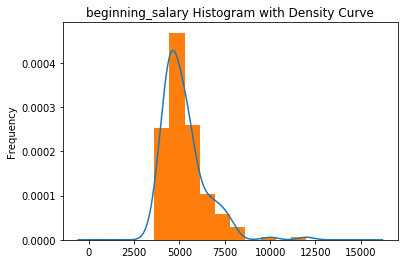

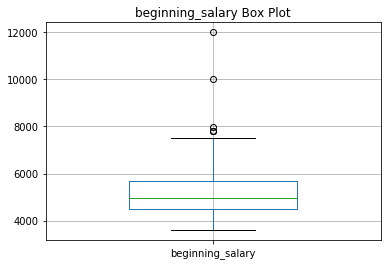

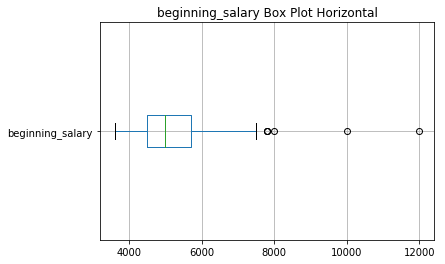

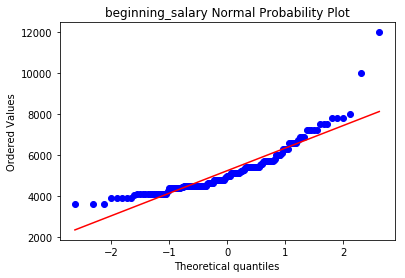



 Univariate Profiling: Examining the Shape of Distribution for job_seniority


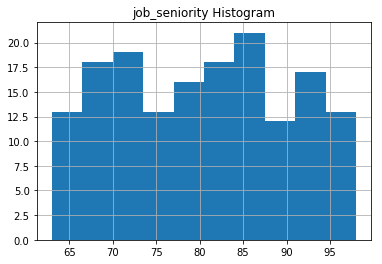

Mean (solid line): 80.25
Median(dotted line): 81.0


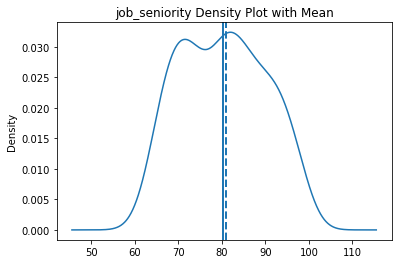

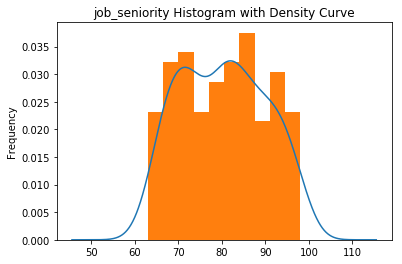

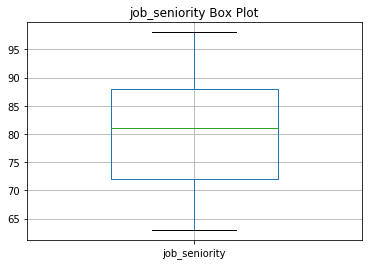

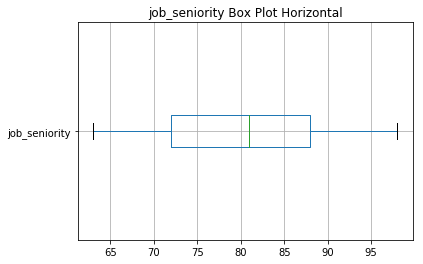

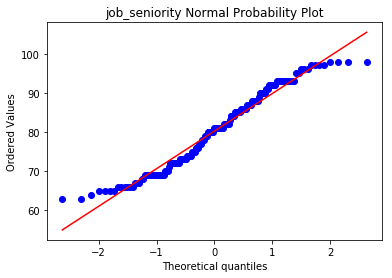



 Univariate Profiling: Examining the Shape of Distribution for age


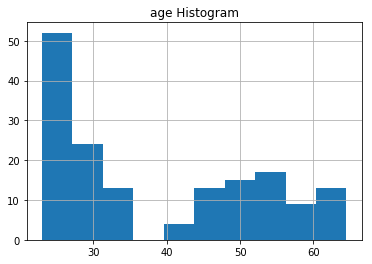

Mean (solid line): 38.6665
Median(dotted line): 32.0


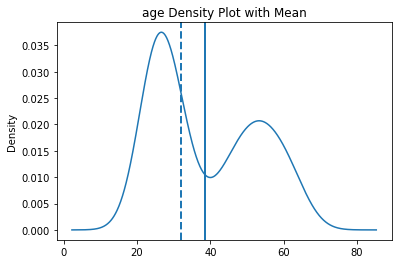

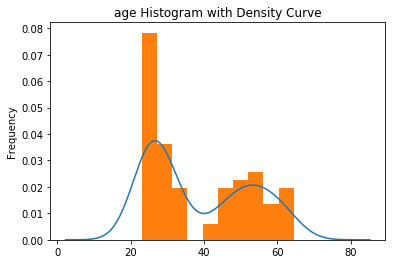

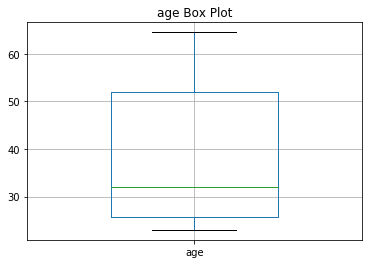

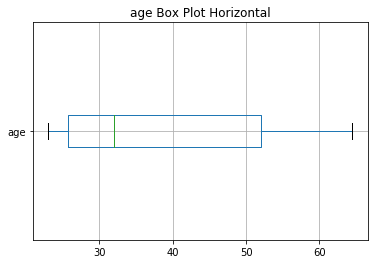

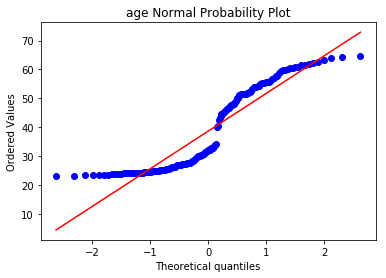



 Univariate Profiling: Examining the Shape of Distribution for current_salary


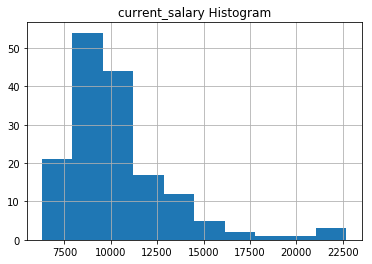

Mean (solid line): 10324.025
Median(dotted line): 9630.0


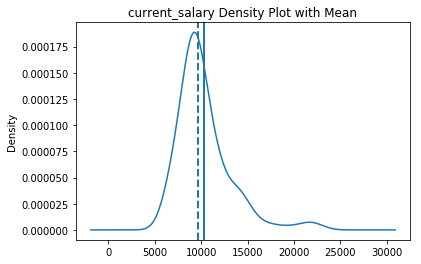

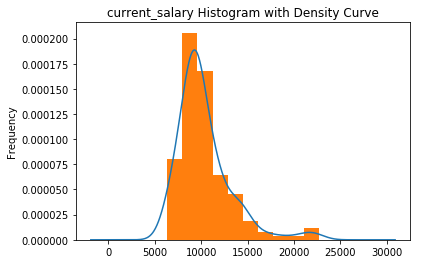

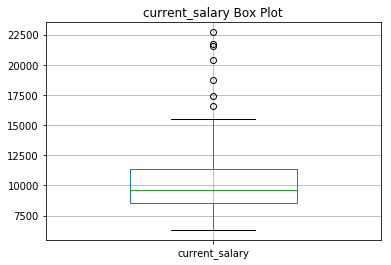

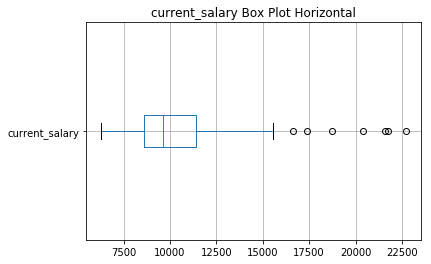

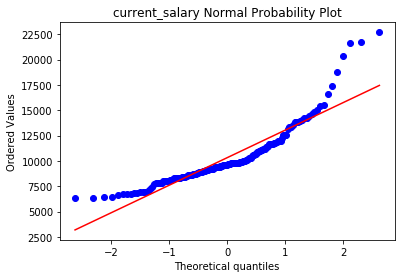



 Univariate Profiling: Examining the Shape of Distribution for work_experience


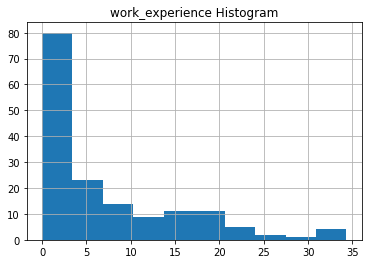

Mean (solid line): 7.02725
Median(dotted line): 3.5


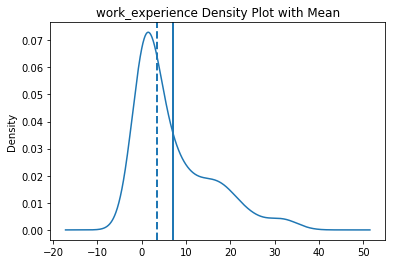

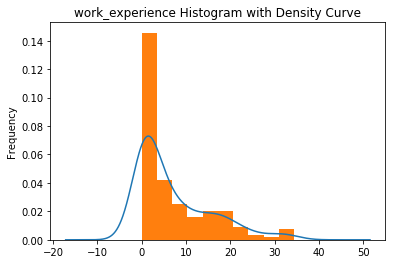

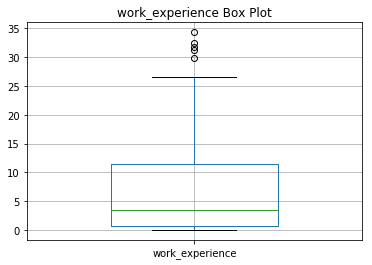

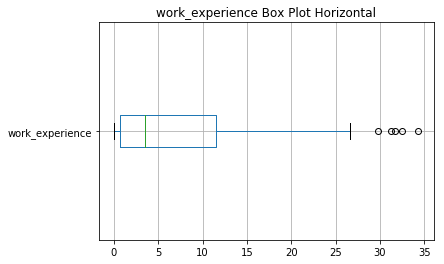

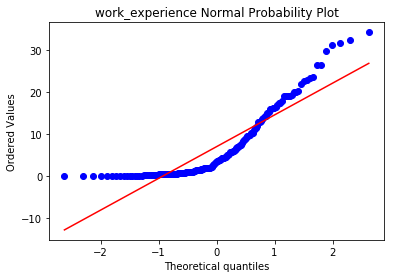

In [376]:
for var in metric_vars:
    display_distribution(var, df1)

### Part 2 Assessment of Normality
K-S Test and Shapiro Wick test of metric variables

The **Kolmogorov-Smirnov test** (K-S test) evaluateds the goodness of fit. This method performs a test of normal distribution against a given variable's distribution. Under the null hypothesis the two distributions are identical, G(x)=F(x). The KS test is only valid for continuous distributions.
* H0: The variable has normality
* Ha: The variable does not have normality

The **Shapiro-Wilk test** tests the null hypothesis that the data was drawn from a normal distribution.
* H0: The variable has normality
* Ha: The variable does not have normality

We fail to reject H0 if the p-value is greater than alpha (0.05), stating that the variable has normality.
We reject the H0 if the p-value is less than alpha (0.05), stating that the data does not have normality.


In [377]:
ks_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
sw_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    ks_test_results, sw_test_results = assess_normality(df0, var, ks_test_results, sw_test_results)


Test of Normality for beginning_salary
K-S Test p-value = 0.0
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Shapiro-Wilk Test p-value = 1.3538178053982848e-17
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test of Normality for job_seniority
K-S Test p-value = 0.0
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Shapiro-Wilk Test p-value = 2.485656409589865e-07
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test of Normality for age
K-S Test p-value = 0.0
We reject the H0 that age has normality. The distribution of age is not normal.

Shapiro-Wilk Test p-value = 9.512301970410197e-14
We reject the H0 that age has normality. The distribution of age is not normal.

Test of Normality for current_salary
K-S Test p-value = 0.0
We reject the H0 that current_salary has

In [378]:
print("K-S Test Results for sex=0:")
ks_test_results

K-S Test Results for sex=0:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,0.000000e+00,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,0.000000e+00,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,0.000000e+00,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,0.000000e+00,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,5.815670e-153,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [379]:
print("Shapiro Wick Test Results for sex=0:")
sw_test_results

Shapiro Wick Test Results for sex=0:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,1.353818e-17,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,2.485656e-07,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,9.512302e-14,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,3.869859e-15,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,3.368892e-14,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [380]:
ks_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
sw_test_results = pd.DataFrame(columns=['variable', 'p_value', 'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    ks_test_results, sw_test_results = assess_normality(df1, var, ks_test_results, sw_test_results)


Test of Normality for beginning_salary
K-S Test p-value = 0.0
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Shapiro-Wilk Test p-value = 8.334078219207619e-12
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test of Normality for job_seniority
K-S Test p-value = 0.0
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Shapiro-Wilk Test p-value = 0.00017222165479324758
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test of Normality for age
K-S Test p-value = 0.0
We reject the H0 that age has normality. The distribution of age is not normal.

Shapiro-Wilk Test p-value = 2.2110917263784557e-11
We reject the H0 that age has normality. The distribution of age is not normal.

Test of Normality for current_salary
K-S Test p-value = 0.0
We reject the H0 that current_salary ha

In [381]:
print("K-S Test Results for sex=1:")
ks_test_results

K-S Test Results for sex=1:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,0.000000e+00,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,0.000000e+00,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,0.000000e+00,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,0.000000e+00,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,6.443472e-49,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [382]:
print("Shapiro Wick Test Results for sex=1:")
sw_test_results

Shapiro Wick Test Results for sex=1:


,variable,p_value,distribution,hypothesis,conclusion
0,beginning_salary,8.334078e-12,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,1.722217e-04,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,2.211092e-11,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,1.110904e-11,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,3.207141e-13,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


### Part 3 Test the Skewness of Distribution
Skewness Z-test and Kurtoses Z-test on metric variables

The **Normal test** Test whether a sample differs from a normal distribution.
* H0: The population from which the sample is drawn has normal distribution
* Ha: The population from which the sample is drawn does not have a normal distribution

The **Kurtoses test** Test whether a dataset has normal kurtosis. The null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.
* H0: The population from which the sample is drawn has normal distribution
* Ha: The population from which the sample is drawn does not have a normal distribution

We fail to reject H0 if the Z-Statistic is less than 1.96, stating that the variable has normality.
We reject the H0 if the Z-Statistic is greater than 1.96, stating that the data does not have normality.

In [383]:
norm_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
kurt_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    norm_test_results, kurt_test_results = assess_skewness(df0, var, norm_test_results, kurt_test_results)


Test the Skewness of Distribution for beginning_salary
Skewness Test Z-Score = -10.743113931895662
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.
Kurtosis Test Z-Score = -6.417310208799206
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test the Skewness of Distribution for job_seniority
Skewness Test Z-Score = -9.661817475066826
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.
Kurtosis Test Z-Score = -9.89367187121628
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test the Skewness of Distribution for age
Skewness Test Z-Score = -6.209619737148529
We reject the H0 that age has normality. The distribution of age is not normal.
Kurtosis Test Z-Score = -1.99220291613684
We reject the H0 that age has normality. The distribution of age is not normal.

Test the Skewness 

In [384]:
print("Skewness Test Results for sex=0:")
norm_test_results

Skewness Test Results for sex=0:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,122.017873,-10.743114,3.192682e-27,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,99.745837,-9.661817,2.190114e-22,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,44.098324,-6.209620,2.655648e-10,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,73.760861,-8.226765,9.616842e-17,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,55.190231,-7.029475,1.036558e-12,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [385]:
print("Kurtosis Test Results for sex=0:")
kurt_test_results

Kurtosis Test Results for sex=0:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,6.522053,-6.417310,3.192682e-27,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,-9.962800,-9.893672,2.190114e-22,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,2.270547,-1.992203,2.655648e-10,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,4.490257,-4.340322,9.616842e-17,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,3.217605,-3.013174,1.036558e-12,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [386]:
norm_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
kurt_test_results = pd.DataFrame(columns=['variable', 'test_statistic', 'z_score', 'p_val',
                                          'distribution', 'hypothesis', 'conclusion'])
for var in metric_vars:
    norm_test_results, kurt_test_results = assess_skewness(df1, var, norm_test_results, kurt_test_results)


Test the Skewness of Distribution for beginning_salary
Skewness Test Z-Score = -8.89015667424837
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.
Kurtosis Test Z-Score = -5.4820027014013135
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Test the Skewness of Distribution for job_seniority
Skewness Test Z-Score = -5.868766235698643
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.
Kurtosis Test Z-Score = -6.186857167578275
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Test the Skewness of Distribution for age
Skewness Test Z-Score = -21.6679442258799
We reject the H0 that age has normality. The distribution of age is not normal.
Kurtosis Test Z-Score = -21.71691011519622
We reject the H0 that age has normality. The distribution of age is not normal.

Test the Skewness 

In [387]:
print("Skewness Test Results for sex=1:")
norm_test_results

Skewness Test Results for sex=1:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,85.267203,-8.890157,3.051140e-19,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,39.873940,-5.868766,2.195250e-09,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,477.493589,-21.667944,2.058659e-104,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,70.226400,-8.012275,5.630294e-16,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,36.594107,-5.590575,1.131594e-08,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


In [388]:
print("Kurtosis Test Results for sex=1:")
kurt_test_results

Kurtosis Test Results for sex=1:


,variable,test_statistic,z_score,p_val,distribution,hypothesis,conclusion
0,beginning_salary,5.603333,-5.482003,3.051140e-19,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,job_seniority,-6.295264,-6.186857,2.195250e-09,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
2,age,-21.748737,-21.716910,2.058659e-104,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
3,current_salary,4.725273,-4.582426,5.630294e-16,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
4,work_experience,2.146403,-1.854401,1.131594e-08,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


## D. Levene's Test of Equal Variances
Testing for homogeneity

In [389]:
def levene_test(df, i, y, category, levene):
    # Execute Levene's Test of Equal Variances for metric vs non-metric variable
    print("\nLeven's Test of Equal Variances for {0} vs {1}".format(i, category))
    levene_test_stat, levene_p_val = stats.levene(df[i], df[y])
    print("Levene's Test statistic = {}".format(levene_test_stat))
    print("Levene's Test p-value = {}".format(levene_p_val))
    print("Levene's Test z-score = {}".format(stats.norm.ppf(levene_p_val)))
    # Evaluate the test
    distribution, hypothesis, conclusion = evaluate_norm_hypothesis(levene_p_val, i)
    # Save the results    
    print("{0}. {1}.".format(hypothesis, conclusion))
    levene = levene.append({'x_var':i, 'y_var':category, 'p_val':levene_p_val, 'z-score':stats.norm.ppf(levene_p_val),
                            'statistic':levene_test_stat, 'distribution':distribution, 
                            'hypothesis':hypothesis, 'conclusion':conclusion}, ignore_index=True)
    return levene

levene = pd.DataFrame(columns=['x_var', 'y_var', 'p_val', 'z-score', 'statistic', 'distribution', 
                               'hypothesis', 'conclusion'])
for var in metric_vars:
    levene = levene_test(df0, var, 'sex', 'sex=0', levene)
    levene = levene_test(df1, var, 'sex', 'sex=1', levene)
    


Leven's Test of Equal Variances for beginning_salary vs sex=0
Levene's Test statistic = 77.77102345956155
Levene's Test p-value = 4.3082882717251024e-17
Levene's Test z-score = -8.322446847782825
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Leven's Test of Equal Variances for beginning_salary vs sex=1
Levene's Test statistic = 141.75971689441263
Levene's Test p-value = 2.7949704666164096e-27
Levene's Test z-score = -10.755386132196488
We reject the H0 that beginning_salary has normality. The distribution of beginning_salary is not normal.

Leven's Test of Equal Variances for job_seniority vs sex=0
Levene's Test statistic = 540.5921028503902
Levene's Test p-value = 6.966206995756447e-75
Levene's Test z-score = -18.271592802229307
We reject the H0 that job_seniority has normality. The distribution of job_seniority is not normal.

Leven's Test of Equal Variances for job_seniority vs sex=1
Levene's Test statistic = 406.35347776

In [390]:
levene

,x_var,y_var,p_val,z-score,statistic,distribution,hypothesis,conclusion
0,beginning_salary,sex=0,4.308288e-17,-8.322447,77.771023,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
1,beginning_salary,sex=1,2.794970e-27,-10.755386,141.759717,Not Normal,We reject the H0 that beginning_salary has nor...,The distribution of beginning_salary is not no...
2,job_seniority,sex=0,6.966207e-75,-18.271593,540.592103,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
3,job_seniority,sex=1,8.484521e-59,-16.125207,406.353478,Not Normal,We reject the H0 that job_seniority has normality,The distribution of job_seniority is not normal
4,age,sex=0,1.029095e-27,-10.847115,140.119993,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
5,age,sex=1,1.260799e-45,-14.128869,280.893030,Not Normal,We reject the H0 that age has normality,The distribution of age is not normal
6,current_salary,sex=0,8.820615e-24,-9.985498,116.059394,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
7,current_salary,sex=1,3.775485e-23,-9.840268,115.261028,Not Normal,We reject the H0 that current_salary has norma...,The distribution of current_salary is not normal
8,work_experience,sex=0,3.547151e-27,-10.733392,136.762434,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal
9,work_experience,sex=1,1.015274e-26,-10.635811,138.070649,Not Normal,We reject the H0 that work_experience has norm...,The distribution of work_experience is not normal


## E. Transformations
If a transformation is necessary for part (b) only, which one would you use for each univariate metric variable?
Transformations: 

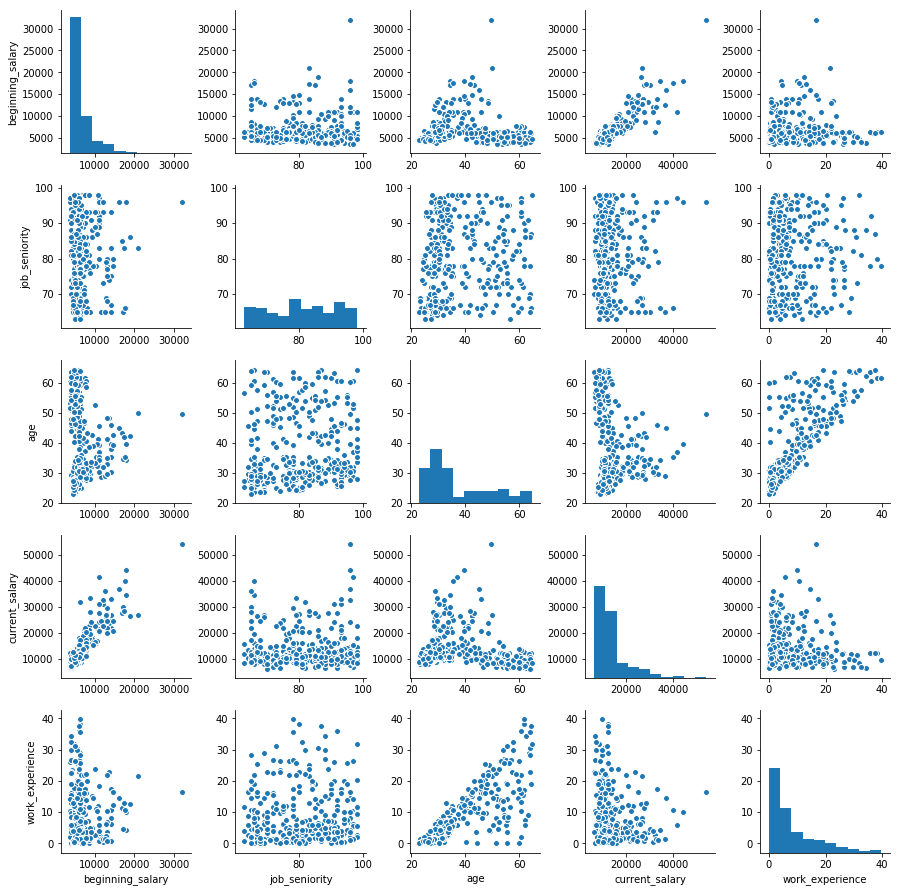

In [392]:
# Print scatter plots for each metric variable to determine homoscedasity
sb.pairplot(df[[*metric_vars]])
plt.show()

/Users/req89250/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


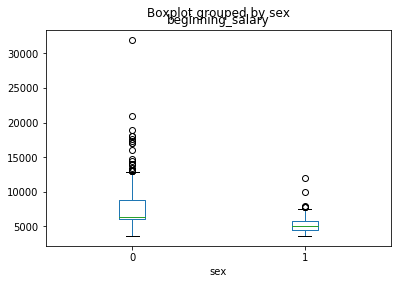

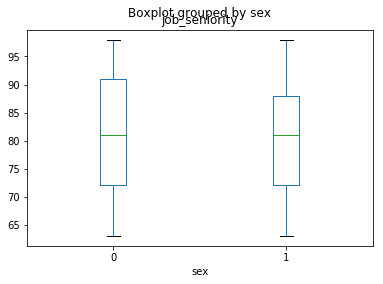

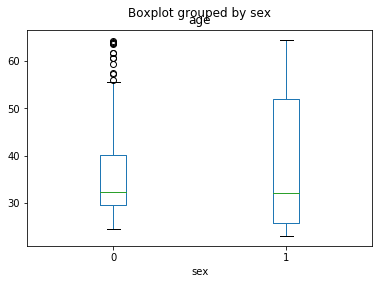

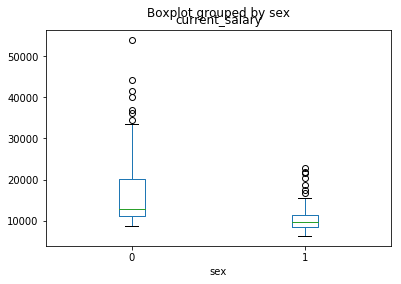

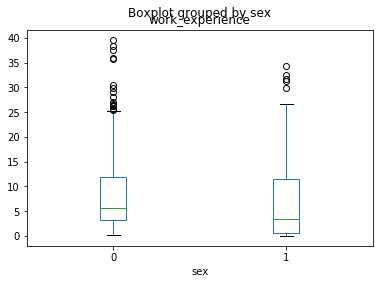

In [393]:
# Create box plots to understand the metric variables vs nonmetric gender
for var in metric_vars:
    df.boxplot(by='sex', column=[var], grid=False)
    plt.show()

In [327]:
transforms_to_test = ['beginning_salary',
                      'job_seniority',
                      'age',
                      'current_salary',
                      'work_experience']
transforms_to_test

['beginning_salary',
 'job_seniority',
 'age',
 'current_salary',
 'work_experience']

In [344]:
def check_normality(vector):    
    # Normal Test
    norm_test_statistic, norm_p_val = stats.normaltest(vector)
    norm_z_score = stats.norm.ppf(norm_p_val)
    # Evaluate the test
    norm_distribution, hypothesis, conclusion = evaluate_skew_hypothesis(norm_z_score, i)
    
    # Kurtosis Test
    kurt_test_statistic, kurt_p_val = stats.kurtosistest(vector)
    kurt_z_score = stats.norm.ppf(kurt_p_val)
    # Evaluate the test
    kurt_distribution, hypothesis, conclusion = evaluate_skew_hypothesis(kurt_z_score, i)

    return norm_z_score, norm_distribution, kurt_z_score, kurt_distribution

inverse = lambda x: ((x+1)**-1)
neg_inverse = lambda x: -((x+1)**-1)
square = lambda x: x ** 2
sqr_root = lambda x: np.exp(x**1/2)
cubed = lambda x: x ** 3
inv_sqr = lambda x: np.exp(-x**2/2)
invr_cubed = lambda x: np.exp(-x**3/3)


def transformation(i, df, transformation, equation):
    print(transformation)
    after = check_normality(df[i].apply(equation))
    print('Skewness z-score after: {}'.format(after[0:2]))
    print('Kurtosis z-score after: {}'.format(after[2:4]))
    
for var in transforms_to_test:
    print('\nTest Transformations of {}'.format(var))
    before = check_normality(df[var])
    print('Skewness z-score before: {}'.format(before[0:2]))
    print('Kurtosis z-score before: {}'.format(before[2:4]))
    transformation(var, df, 'Inverse', inverse)
    transformation(var, df, 'Squared', square)
    transformation(var, df, 'Square Root', sqr_root)
    transformation(var, df, 'Cubed', cubed)
    transformation(var, df, 'Inverse Squared', inv_sqr)
    transformation(var, df, 'Log', np.log)
    transformation(var, df, 'Neg Inverse', neg_inverse)
    transformation(var, df, 'Inverse Cubed', invr_cubed)
    print('')
    



Test Transformations of beginning_salary
Skewness z-score before: (-15.65140435677476, 'Not Normal')
Kurtosis z-score before: (-9.157562871985887, 'Not Normal')
Inverse
Skewness z-score after: (-1.7141534936239236, 'Not Normal')
Kurtosis z-score after: (0.4616903272540309, 'Not Normal')
Squared
Skewness z-score after: (-21.783382010268166, 'Not Normal')
Kurtosis z-score after: (-12.29205666589232, 'Not Normal')
Square Root
Skewness z-score after: (nan, 'Not Normal')
Kurtosis z-score after: (nan, 'Not Normal')
Cubed
Skewness z-score after: (-25.807195380156685, 'Not Normal')
Kurtosis z-score after: (-13.58374270466168, 'Not Normal')
Inverse Squared
Skewness z-score after: (-33.01676683141454, 'Not Normal')
Kurtosis z-score after: (-33.11404596399206, 'Not Normal')
Log
Skewness z-score after: (-8.87190171905387, 'Not Normal')
Kurtosis z-score after: (-4.238476814494407, 'Not Normal')
Neg Inverse
Skewness z-score after: (-1.7141534936239244, 'Not Normal')
Kurtosis z-score after: (0.46169

/Users/req89250/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:969: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
/Users/req89250/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1087: RuntimeWarning: invalid value encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,


In [338]:
# Specifically test age 
check_normality(df['age'].apply( lambda x: x ** 2))

(-6.690725194076264, 'Not Normal', 2.644215238481439, 'Normal')

## G. Univariate Outlier Detection
Perform test of univariate outliers using Z (standardize values)

In [421]:
for var in metric_vars:
    
    zdf = df.copy()
    # Step 1: convert data values to standard scores
    zdf['z_scores'] = stats.zscore(df[var])
    # Step 2: Indicate scores that exceed +/- 2.5
    print('Detecting outliers for {}'.format(var))
    outliers = pd.DataFrame(columns=['Index', 'z_scores'])
    for i, row in zdf.iterrows():
        if (row['z_scores'] > 2.5) or (row['z_scores'] < -2.5):
            outliers = outliers.append({'Index':row['Index'], 'z_scores':row['z_scores']}, ignore_index=True)
    print(outliers)
            

Detecting outliers for beginning_salary
   Index  z_scores
0   67.0  3.805767
1   55.0  3.495068
2  172.0  3.184369
3  122.0  4.430908
4   56.0  7.859826
5  132.0  3.495068
6  145.0  2.869927
7   23.0  3.180626
8    5.0  3.307900
9  415.0  3.382767
Detecting outliers for job_seniority
Empty DataFrame
Columns: [Index, z_scores]
Index: []
Detecting outliers for age
Empty DataFrame
Columns: [Index, z_scores]
Index: []
Detecting outliers for current_salary
    Index  z_scores
0   149.0  4.082993
1    76.0  2.578546
2    55.0  3.055566
3    60.0  2.688628
4    56.0  5.917684
5   132.0  4.486625
6   180.0  2.762016
7   176.0  2.835403
8   145.0  3.393149
9   129.0  2.908791
10  415.0  3.862830
11   29.0  2.585885
12  123.0  3.312423
Detecting outliers for work_experience
    Index  z_scores
0   369.0  2.522711
1    86.0  3.511987
2   382.0  3.240809
3   364.0  3.046445
4   163.0  3.667943
5    39.0  3.211712
6   158.0  3.424698
7   422.0  2.610000
8   196.0  2.746171
9   239.0  2.833460
10  

## H. Bivariate Outlier Detection
Perform test of bivariate outliers only using Scatter plot between Sales now and the other metric variables.

In [436]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

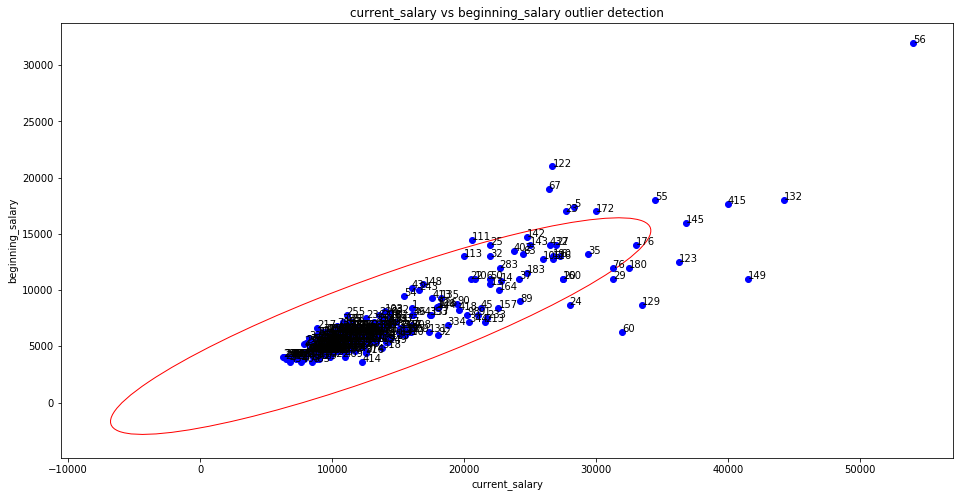

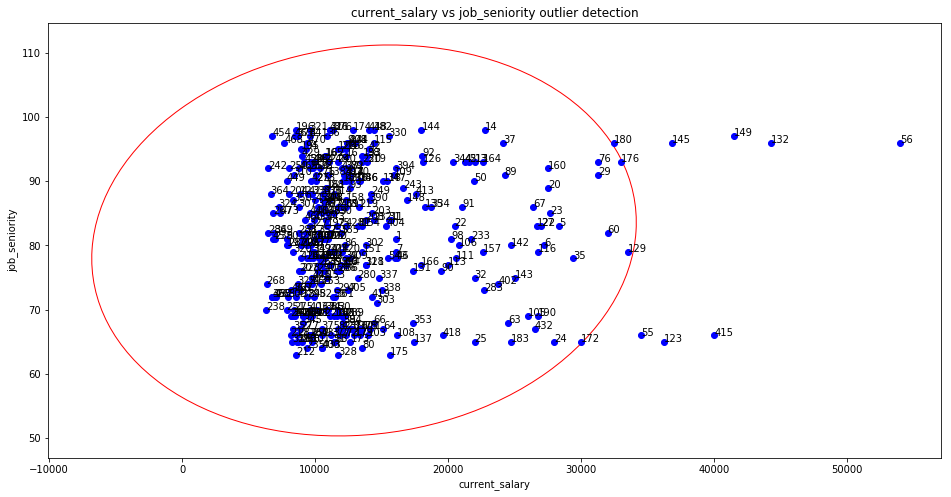

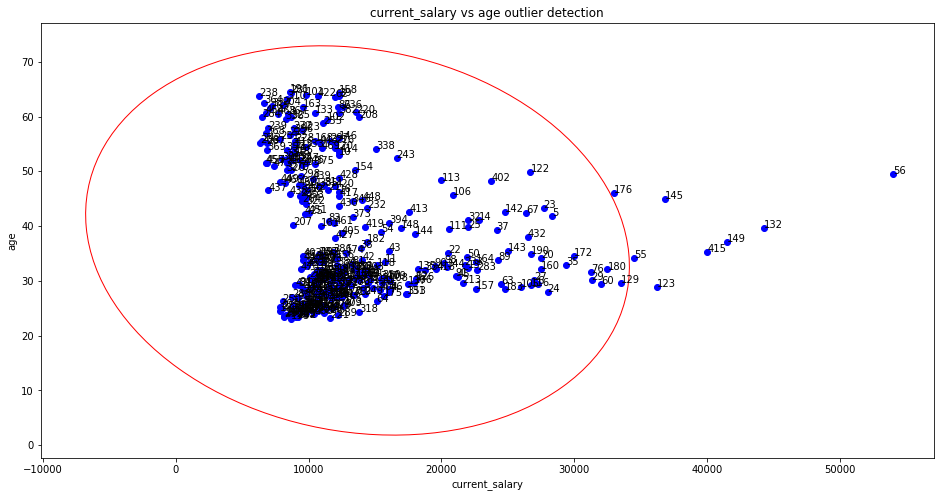

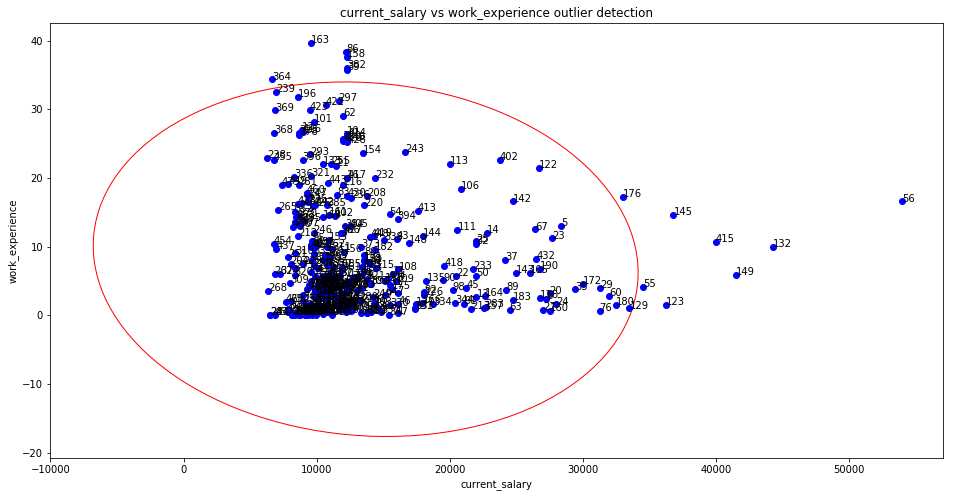

In [492]:
for i in metric_vars:
    if i != 'current_salary':
        x = df['current_salary']
        y = df[i]
        fig, ax = plt.subplots(figsize=(16,8))
        confidence_ellipse(x, y, ax, edgecolor='red')
        # Plot a transparent 3 standard deviation covariance ellipse
        ax.scatter(x, y, s=0.5, c='black')
        ax.set_xlabel('current_salary')
        ax.set_ylabel(i)
        ax.set_title('current_salary vs {} outlier detection'.format(i))

        for p in range(len(x)):
            pointRefNumber = df['Index'].iloc[p]
            xPoint =  df['current_salary'].iloc[p]
            yPoint =  df[i].iloc[p]
            ax.plot(xPoint, yPoint, 'bo')
            ax.annotate(pointRefNumber, (xPoint, yPoint), color='black')
        plt.show()

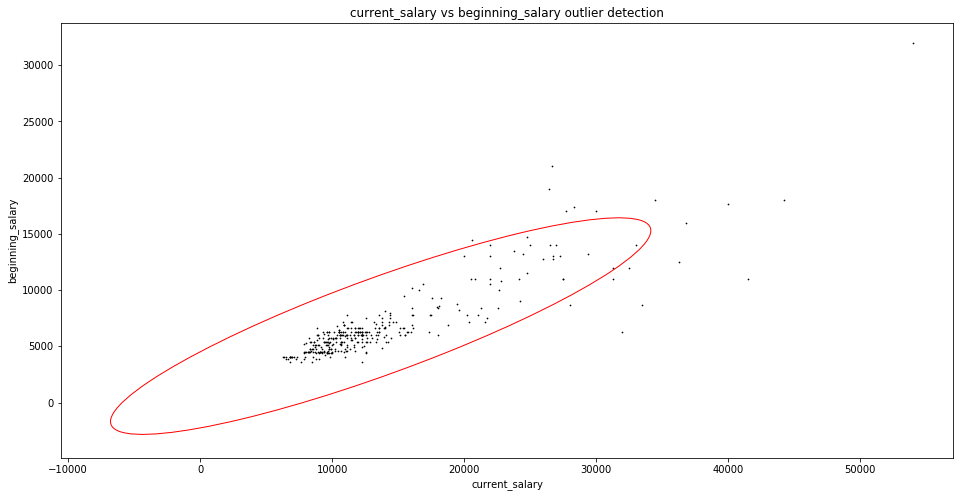

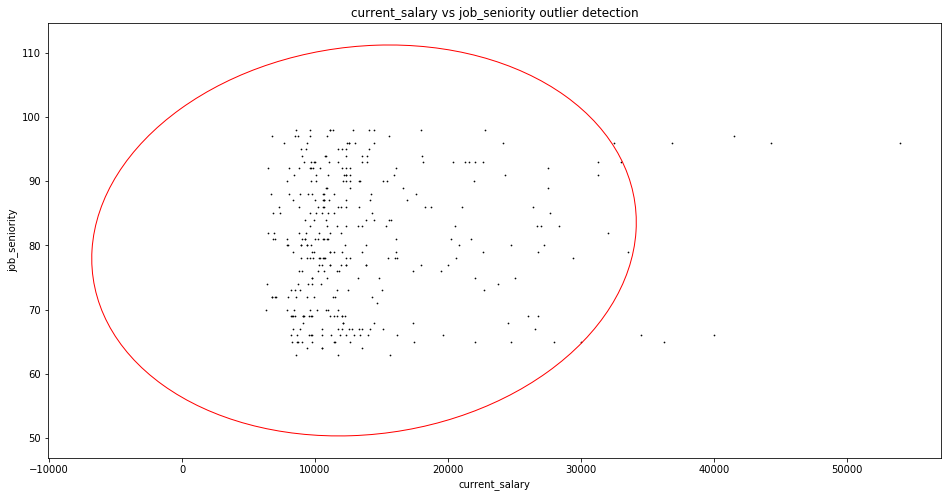

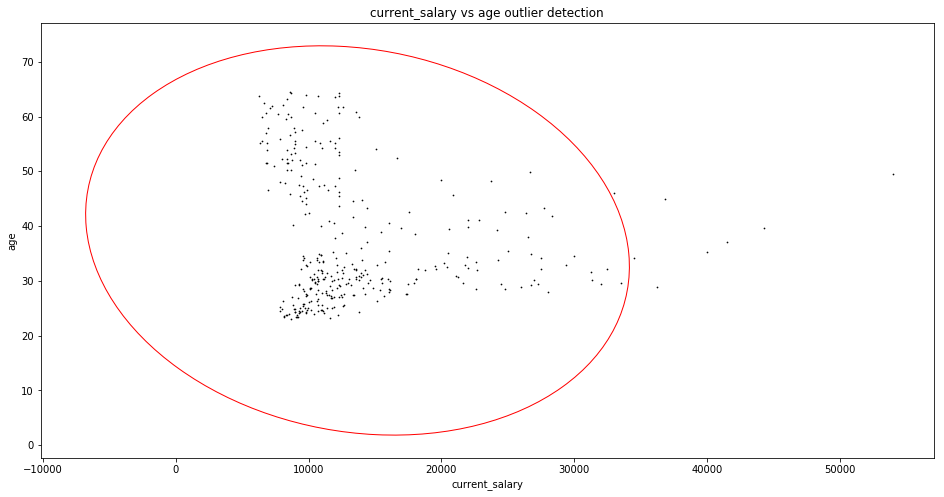

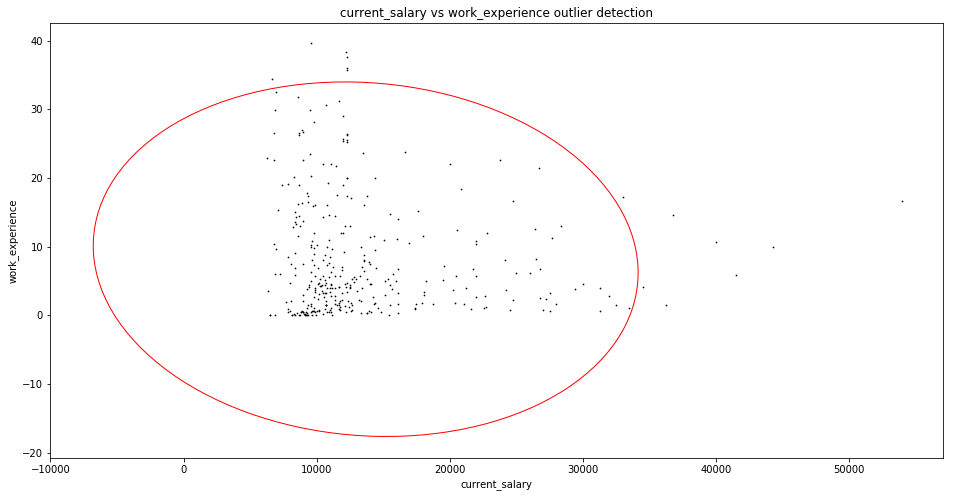

In [493]:
for i in metric_vars:
    if i != 'current_salary':
        x = df['current_salary']
        y = df[i]
        fig, ax = plt.subplots(figsize=(16,8))
        confidence_ellipse(x, y, ax, edgecolor='red')
        # Plot a transparent 3 standard deviation covariance ellipse
        ax.scatter(x, y, s=0.5, c='black')
        ax.set_xlabel('current_salary')
        ax.set_ylabel(i)
        ax.set_title('current_salary vs {} outlier detection'.format(i))
        plt.show()